# Property Price Prediction

 ## Overview
 
#### This project focuses on predicting property prices in various districts of California using several district-level features. By building a predictive model, we aim to identify key variables that influence housing prices and improve the accuracy of house value predictions. The project will specifically utilize simple linear regression and multiple linear regression to address this regression task, ensuring proper data handling and evaluation of the models.

## Problem Statement

#### The objective is to predict the median house value in California districts based on features such as income, the number of rooms, geographical location, and proximity to the ocean. Given the dataset, we will develop regression models, evaluate their performance, and determine which model provides the best balance between predictive accuracy and interpretability.

## Objective

#### Goal: Predict property prices using district-level features.

#### Why: To identify which factors most influence housing prices and to build accurate predictive models

## The model will consider variables such as:

#### Median income

#### Number of rooms

#### Geographic location

#### Proximity to the ocean

## Modeling Techniques

#### Two types of regression models will be used:

#### 1. Simple Linear Regression: Examines the relationship between one independent variable and the house price.
#### 2. Multiple Linear Regression: Considers multiple features simultaneously to predict house prices.

## Data Handling

#### Proper data preprocessing is emphasized, including handling missing values and encoding categorical variables.
#### Evaluation metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² will be used to assess model performance.

## Data Dictionary
#### 

In [16]:
# imported pandas library to read the CSV file
import pandas as pd
csv_url = "https://docs.google.com/spreadsheets/d/1B9RTjgPSEWyQzDr-CQJmCYRriaBIaGq2WEkfp2TLTIA/export?format=csv&gid=981807341"

# We loaded the dataset into a Pandas DataFrame
df = pd.read_csv(csv_url)

# we display the first 10 rows to verify the columns
print(df.head(10)) # by giving the value here you can print as many a s row you want to, default is 5 rows
# we just display the column names to verify the dataset



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   
5    -122.25     37.85                  52          919           213.0   
6    -122.25     37.84                  52         2535           489.0   
7    -122.25     37.84                  52         3104           687.0   
8    -122.26     37.84                  42         2555           665.0   
9    -122.25     37.84                  52         3549           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401   

In [17]:
df.info() 

#This command gives you a summary of the DataFrame, including: 
# Column names, Data types (e.g., float64, int64), Non-null counts (helps detect missing values), Memory usage

# Why is it useful?

# Confirms that all features are numeric, which is ideal for regression.
# Ensures there are no missing values (as stated in your dataset description).
# Helps you decide if any columns need type conversion or cleaning.

df.describe() 

# This command provides summary statistics for each numeric column:
# Count, mean, std deviation
# Min, max, 25%, 50%, 75% percentile

# Why is it useful?

# Reveals distribution patterns (e.g., skewness in MedInc and MedHouseVal)
# Helps spot outliers or capped values (like MedHouseVal being capped at 5.0)
# Guides feature selection and scaling decisions



# Handle missing values:
if df['total_bedrooms'].isnull().sum() > 0: # Check for Missing Value
   
    # df['total_bedrooms']: Selects the total_bedrooms column from the DataFrame.
# .isnull(): Returns a boolean Series, where True means the value is missing (NaN).
# .sum(): Counts the number of True values, i.e., the number of missing entries.
#  > 0: Checks if there are any missing values.
#  Purpose: This line checks if there are any missing values in the total_bedrooms column before proceeding.
 median_bedrooms = df['total_bedrooms'].median()
 # .median(): Calculates the median (middle value) of the total_bedrooms column, ignoring any missing values.
# Purpose: The median is less sensitive to outliers than the mean, making it a good choice for imputation.
 df['total_bedrooms'].fillna(median_bedrooms, inplace=True)
 # .fillna(median_bedrooms): Replaces all missing values in the column with the value stored in median_bedrooms.
#inplace=True: Modifies the DataFrame in place, so the changes are saved directly to df without needing to assign it back.
#Purpose: This line fills all missing values in total_bedrooms with the median value calculated above.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


C:\Users\priya\AppData\Local\Temp\ipykernel_20428\2912344022.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


# Exploratory Data Analysis (EDA)

## We visualize and explore relationships in the data:

### 1. Feature distributions: We plot histograms of each feature and the target.
### 2. Correlation: We examine how strongly each feature is related to the median house value.
### 3. Scatter plots: We check key relationships such as MedInc vs. MedHouseVal.
### 4. Geographic trends: (Optional) We could map prices by latitude/longitude to see location effects

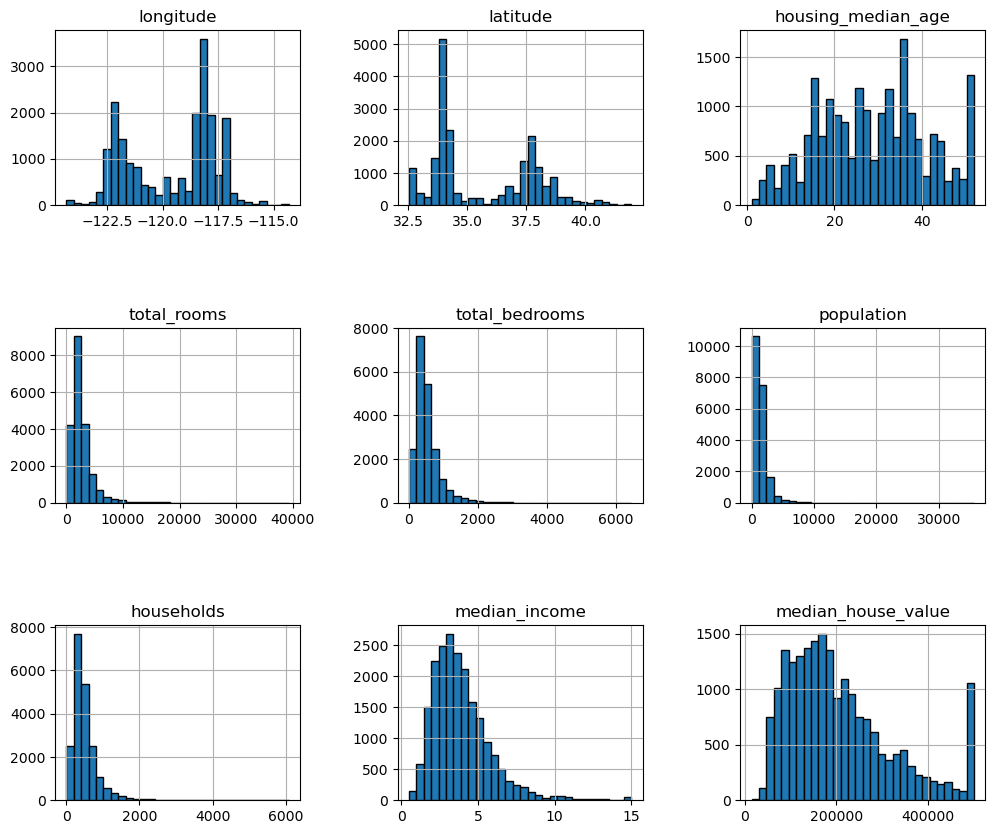

In [18]:
# Importing matplotlib for plotting histograms
import matplotlib.pyplot as plt
# Plot histograms of all features and target
df.hist(figsize=(12, 10), bins=30, edgecolor='black') # Plots histograms for every numeric column in the DataFrame. 
# figsize sets the size of the entire figure.
# bins=30 divides the data range into 30 intervals for each histogram.
# edgecolor= 'black' makes the bars easier to see by outlining them.

plt.subplots_adjust(hspace=0.7, wspace=0.4)
# Adjusts the spacing between subplots:

# 'hspace' controls vertical spacing.
# 'wspace' controls horizontal spacing.
# Prevents overlapping labels and makes the layout cleaner.

plt.show() # Displays the entire figure with all histograms.

# This code generates histograms for each feature and the target variable
# This block is part of Exploratory Data Analysis (EDA).
# It helps to visualize the distribution of each feature and the target in the dataset.

 Histograms of each feature and the target Median_house_value. The plots show that Median_Income and Median_House Value have long right-skewed distributions. In particular, Median_House_Value is capped at 5.0 (i.e. \$500K) for the highest values
  
 From the histograms above, we observe:
  
   • Median Income : Long right tail (some very high incomes) .
   
   • Median House Value (target): Right-skewed with a sharp cutoff at 5.0 (interpreted as \$500K) .
   
   • Other features like Total Rooms, Population, etc., have a few extreme values (possible outliers)

 Next, we examine correlations. The correlation matrix (or scatter plots) reveals that Median Income is the
 strongest predictor of house value. For instance, a scatter plot of Median Income vs. Median House Value shows a clear
 positive trend (higher income areas have higher house values) .
 Similarly, a correlation heatmap confirms that Median Income has the highest correlation with Median House Value . 

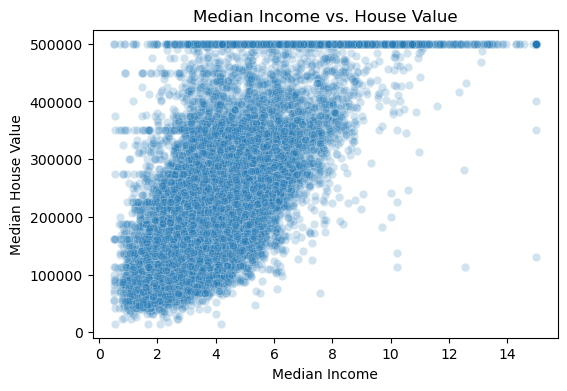

In [19]:
# Importing seaborn for advanced visualization 
import seaborn as sns # Seaborn is a powerful visualization library built on top of Matplotlib.


# Scatter plot: Median Income vs. Median House Value
plt.figure(figsize=(6,4))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.2)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. House Value')
plt.show()

 
 This scatter plot reinforce that Median Income and Median House Value have a strong positive
 linear relationship. The upward trend indicates that income is a powerful driver of house prices .
 

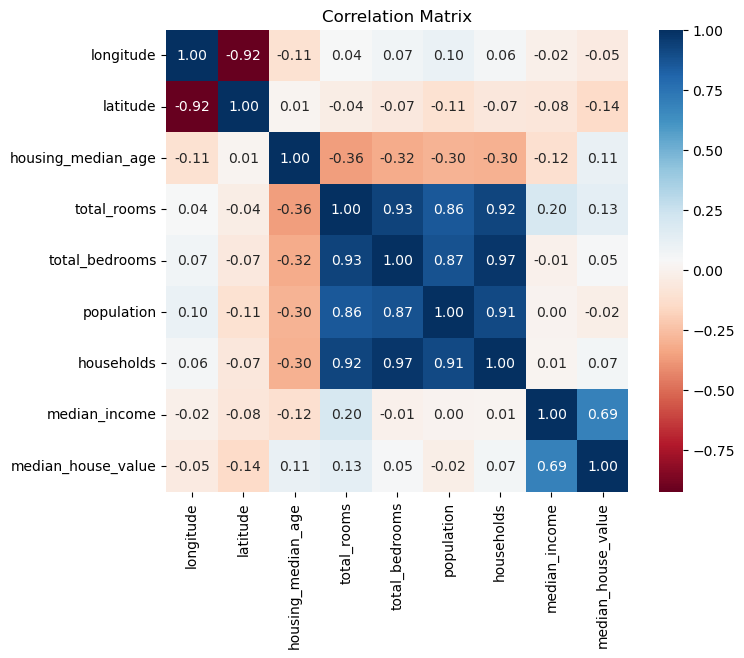

In [20]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6)) # adjusts the overall size of the plot for readability.

numeric_df = df.select_dtypes(include=['number']) 
# Selects only the numeric columns from the DataFrame 'df' and creates a new DataFrame 'numeric_df'.
# This is important because correlation can only be computed between numeric variables.

corr_matrix = numeric_df.corr()
# Computes the correlation matrix for all numeric columns in 'numeric_df'.
# The result is a square matrix where each cell [i, j] contains the correlation coefficient between feature i and feature j.

# Draw the heatmap using seaborn
sns.heatmap(
    corr_matrix,           # The correlation matrix to visualize
    annot=True,            # Write the correlation coefficients in each cell
    fmt=".2f",             # Format the numbers to 2 decimal places
    cmap="RdBu",           # Use the Red-Blue color map for better contrast
    square=True            # Make each cell square-shaped for a cleaner look
)
# This creates a heatmap plot where the color and the number in each cell represent the correlation between two features.
# 'annot=True' overlays the actual correlation values on the heatmap.
# 'fmt=".2f"' ensures the numbers are shown with two decimal places.
# 'cmap="RdBu"' uses a diverging color palette, making it easy to see positive vs. negative correlations.
# 'square=True' makes the cells square for a visually balanced plot.

plt.title("Correlation Matrix")
# Adds a title to the plot.

plt.show()
# Displays the plot.

 These EDA findings guide our modeling: MedInc is the top candidate for a simple regression, and using
 multiple features should further improve accuracy.

## Handling missing values 

In [21]:
# Impute missing values in 'total_bedrooms' with the median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Verify no missing values remain
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


C:\Users\priya\AppData\Local\Temp\ipykernel_20428\3373126228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


In [ ]:
# Impute missing values in 'total_bedrooms' with the median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Verify no missing values remain
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


C:\Users\priya\AppData\Local\Temp\ipykernel_20428\3373126228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


## Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
# This imports the train_test_split function from scikit-learn, which is used to split the dataset into training and testing sets.
# 1. Check missing values
print("Missing values per column:\n", df.isnull().sum())
# This line prints the number of missing (null) values for each column in the DataFrame 'df'.
# It's important to check for missing data before modeling, as many algorithms can't handle NaNs.

if "ocean_proximity" in df.columns:
    df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)
# This block checks if the column 'ocean_proximity' exists in the DataFrame.
# If it does, it applies one-hot encoding to convert the categorical 'ocean_proximity' column into binary columns.
# 'drop_first=True' avoids multicollinearity by dropping the first category.

# 3. Define features (X) and target (y)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
# Here, 'X' is created by dropping the target column 'median_house_value' from the DataFrame.
# 'y' is set as the target variable, which is the 'median_house_value' column.

# 4. Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
# This splits the features and target into training and testing sets.
# 80% of the data is used for training, and 20% for testing.
# 'random_state=42' ensures reproducibility of the split.

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
# This prints the shape (number of rows and columns) of the training and testing feature sets.
# It helps confirm the split was performed as expected.

Missing values per column:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
Train set: (16512, 12), Test set: (4128, 12)


# Implement simple linear regression using only 'median_income' as a predictor, including model fitting and evaluation (MSE, RMSE, R²).

### Simple lenear Regression

#### Simple linear regression is a statistical method used to model the relationship between a single independent variable (feature) and a dependent variable (target), by fitting a straight line to the data.
#### Mathematical form: y = b0 + b1x
##### y: The target variable (what you want to predict)
##### x: The independent variable (the single feature)
##### b0: The intercept (where the line crosses the y-axis)
##### b1: The slope (how much y changes for a unit change in x)
##### here in our case y = House price , x = Median income


In [23]:
# Import necessary modules
from sklearn.linear_model import LinearRegression  # For creating the regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
import numpy as np  # For numerical operations

# Select only 'median_income' as the predictor for simple linear regression
X_train_income = X_train[['median_income']]  # Training data (feature)
X_test_income = X_test[['median_income']]    # Test data (feature)

# Initialize the LinearRegression model
simple_lr = LinearRegression()

# Fit the model to the training data
simple_lr.fit(X_train_income, y_train)

# Predict house values on the test set using the trained model
y_pred_simple = simple_lr.predict(X_test_income)

# Calculate Mean Squared Error (MSE) - average squared difference between actual and predicted values
mse_simple = mean_squared_error(y_test, y_pred_simple)

# Calculate Root Mean Squared Error (RMSE) - square root of MSE, interpretable in original units
rmse_simple = np.sqrt(mse_simple)

# Calculate R^2 Score - proportion of variance in target explained by the model (1 is perfect)
r2_simple = r2_score(y_test, y_pred_simple)

# Print the evaluation metrics
print("Simple Linear Regression Results (using only 'median_income'):")
print(f"MSE: {mse_simple:.2f}")
print(f"RMSE: {rmse_simple:.2f}")
print(f"R^2: {r2_simple:.4f}")

Simple Linear Regression Results (using only 'median_income'):
MSE: 7091157771.77
RMSE: 84209.01
R^2: 0.4589


# Implement multiple linear regression using all features, including model fitting and evaluation (MSE, RMSE, R²).

### Multiple Linear Regression
#### Multiple linear regression models the relationship between two or more independent variables (features) and a dependent variable (target), by fitting a hyperplane (a generalization of a line in higher dimensions) to the data.
#### Mathematical form: y = b0 + b1x1 +...+ bnxn
##### y: The target variable
##### x1,x2,...,xn: The independent variables (multiple features)
##### b0: The intercept
##### b1,b2,..., bn: The coefficients (Effects of each feature on the target) 
##### here in our case 
##### y = house price
##### x1 = median income 
##### x2 = number of rooms
##### x3 = latitude
##### x4 = longitude , etc


In [24]:
# Initialize the LinearRegression model for multiple features
multi_lr = LinearRegression()

# Fit the model to the training data using all features
multi_lr.fit(X_train, y_train)

# Predict house values on the test set using the trained model
y_pred_multi = multi_lr.predict(X_test)

# Calculate Mean Squared Error (MSE) for multiple regression
mse_multi = mean_squared_error(y_test, y_pred_multi)

# Calculate Root Mean Squared Error (RMSE) for multiple regression
rmse_multi = np.sqrt(mse_multi)

# Calculate R^2 Score for multiple regression
r2_multi = r2_score(y_test, y_pred_multi)

# Print the evaluation metrics
print("Multiple Linear Regression Results (using all features):")
print(f"MSE: {mse_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R^2: {r2_multi:.4f}")

Multiple Linear Regression Results (using all features):
MSE: 4908476721.16
RMSE: 70060.52
R^2: 0.6254


## Comparing medel performance 

#### Simple Linear Regression Results (using median_income as predictor)

##### Mean Squared Error (MSE): 7,091,157,771.77 - This is the average squared difference between the actual and predicted house values. Lower is better, but the value is in squared dollars, so it’s not directly interpretable.
##### Root Mean Squared Error (RMSE): 84,209.01 - This is the standard deviation of the prediction errors, in the same units as house value (dollars). On average, your predictions are off by about \$84,209.
##### R² Score: 0.4589 - This means that about 45.9% of the variance in house prices can be explained by median income alone. The rest is due to other factors or noise.

##### Interpretation: 
##### Using only median income as a predictor, the model explains about 46% of the variance in house prices. The average prediction error is around \$84,209, which suggests that while income is a strong predictor, other factors also play a significant role in determining house values.

## Conclusion

**Objective Recap:**  
The goal of this project was to predict median house values in California districts using district-level features, starting with simple linear regression (using only median income) and then multiple linear regression (using all available features).

**Approach:**  
We performed exploratory data analysis, handled missing values, encoded categorical variables, and split the data into training and test sets. We then built and evaluated both simple and multiple linear regression models.

**Model Comparison:**

| Model                     | RMSE      | R² Score |
|---------------------------|-----------|----------|
| Simple Linear Regression  | \$84,209  | 0.4589   |
| Multiple Linear Regression| \$70,061  | 0.6254   |

- The multiple linear regression model outperformed the simple model, reducing the average prediction error by over \$14,000 and explaining about 62.5% of the variance in house prices (compared to 45.9% for the simple model).

**Interpretation:**  
- Median income is a strong predictor of house prices, but including additional features (such as number of rooms, location, and proximity to the ocean) significantly improves prediction accuracy.
- Despite the improvement, about 37.5% of the variance in house prices remains unexplained, suggesting that other factors (or non-linear relationships) may be important.

**Limitations:**  
- The target variable is capped at \$500,000, which may affect model performance for high-value properties.
- The models only capture linear relationships and may not account for complex interactions or non-linear effects.
- Outliers and unmodeled variables could impact accuracy.

**Next Steps:**  
- Explore non-linear models (e.g., decision trees, random forests).
- Engineer new features or transform existing ones.
- Investigate and handle outliers.
- Incorporate additional data if available.

**Final Thoughts:**  
Linear regression provides a solid baseline for property price prediction, and including more features leads to better performance. However, further improvements are possible with more advanced modeling techniques and deeper data exploration.

### Success Criteria Review

- **Accuracy and Interpretability:**  
  We compared simple and multiple linear regression models. While the multiple regression model achieved higher accuracy (lower RMSE and higher R²), both models remain interpretable, as the effect of each feature on house price can be directly observed from the model coefficients.

- **Evaluation Metrics:**  
  Model performance was assessed using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R². These metrics guided our model selection and demonstrated the improvement gained by including more features.

- **Documentation and Visualizations:**  
  Each step of the analysis is documented with explanations and visualizations, including feature distributions, relationships, and model performance. (Optional: Below, we include a plot comparing actual and predicted house values for the test set.)

Done by Piryam 